<img src="attachment:ATLASOD.gif">

# How to rediscover the Higgs boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Higgs boson yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

This analysis loosely follows the [paper for the discovery of the Higgs boson by ATLAS](https://www.sciencedirect.com/science/article/pii/S037026931200857X#fg0040) (mostly Section 5 and 5.1).

For the sort of level of understanding required to follow this notebook, you can read this [article on the Higgs boson](http://hyperphysics.phy-astr.gsu.edu/hbase/Forces/higgs.html?fbclid=IwAR1ocxfiTOUW2dsdn1AMUL8IBnyBARS8mKKpWIlosTor66yRBdyyHH12naA#c1).

By the end of this notebook you will be able to:
1. rediscover the Higgs boson yourself!
2. know some general principles of a particle physics analysis

The datasets used in this notebook have already been filtered to include at least 2 photons per event, so that processing is quicker.

All Feynman diagram pictures are borrowed from our friends at [Particle Zoo](https://www.particlezoo.net).

<img src="attachment:Hyy_feynman.png" width=40%>

## Contents: 

[Instructions](#Instructions) <br />
[Running a Jupyter notebook](#running) <br />
[Setting up](#setting_up) <br />
[Input data](#fraction) <br />
[Invariant mass calculation](#invariant_mass) <br />
[Plotting definitions](#plotting) <br />
[Data histogramming and plotting](#histogramming) <br />
[Applying cuts](#applying_cuts) <br />
[Fitting](#fitting) <br />
[Chi squared](#chi) <br />
[What can you do to explore this analysis?](#going_further) <br />

## Instructions <a id="instructions"></a>

1. Fill in the missing pieces in the ['Invariant mass calculation' code cell](#invariant_mass)
2. Fill in the missing pieces in the ['Plotting definitions' code cell](#plotting)
3. Fill in the missing pieces in the ['Data histogramming and plotting' code cell](#histogramming)
4. In the top menu, click 'Run' -> 'Run all'
5. [Check out the plot you've made](#view_plot_before)

Let's try separate the signal from the background to see a more significant bump around the Higgs mass.

6. Fill in the missing pieces in the ['Applying cuts' code cell](#applying_cuts)
7. In the top menu, click 'Run' -> 'Run all'
8. [Check out the new plot you've made](#view_plot_after)

Now that we've applied cuts to separate signal from background, let's make a fit.

9. [Check out the fitted plot you've made](#fitting)
10. Fill in the missing pieces in the ['Chi squared' code cell](#chi)
11. Follow the instructions underneath the ['Chi squared' code cell](#chi) to interpret your result.

## Running a Jupyter notebook <a id="running"></a>

To run the whole Jupyter notebook, in the top menu click Run -> Run all.

To propagate a change you've made to a piece of code, click Run -> Run after.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.
    

## Setting up <a id="setting_up"></a>

(To be done every time you re-open this notebook)

We're going to be using a number of tools to help us:
* pandas: lets us store data as dataframes, a format widely used in python
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations
* scipy: tool for statistical fitting

In [6]:
import pandas as pd # to store data as dataframe
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from scipy.optimize import curve_fit # for the signal and background fit

## Input data <a id="fraction"></a>

Samples to process, fraction of data used, and sample cycling function.

In [8]:
samples_list = ['data_A'] # add 'data_B','data_C','data_D' later if you want

fraction = 0.8 # increase this later if you want

DataFrames = {} # define empty dictionary to hold dataframes
for s in samples_list: # loop over samples
    DataFrames[s] = pd.read_csv(s+'.csv', index_col='entry') # read .csv file
all_data = pd.concat(DataFrames) # merge DataFrames into one

In [10]:
all_data

photon_pt_1  photon_pt_2  photon_eta_1  photon_eta_2  \
       entry                                                          
data_A 0         46.690223    29.442607     -1.779089      1.168063   
       1         60.888738    37.795012      0.174119     -0.968964   
       2         39.186211    25.327361      0.139337     -1.309055   
       3         35.529688    29.579598      1.048340      1.293301   
       4         48.605836    29.717975     -0.448705      0.351249   
...                    ...          ...           ...           ...   
       430339    40.663313    37.260895      0.615960      1.934763   
       430340    93.752891    38.948086      0.796197      0.387762   
       430341    39.450035    31.067449     -0.659988     -0.456946   
       430342    65.747492    33.625590      0.709241      0.427151   
       430343    40.766176    35.701254      0.618651     -0.918812   

               photon_phi_1  photon_phi_2  photon_E_1  photon_E_2  \
       entry                                                        
data_A 0          -2.186474      1.127363  142.247594   51.918000   
       1           1.859500     -0.888251   61.814070   56.970105   
       2           1.016534     -1.787857   39.567223   50.309613   
       3           1.587437     -1.533586   56.908457   57.963633   
       4           0.719785      2.904021   53.581543   31.570137   
...                     ...           ...         ...         ...   
       430339     -2.739683      0.161914   48.624289  131.658844   
       430340      2.766711     -1.657127  125.072656   41.913059   
       430341     -0.192359      3.072247   48.358387   34.367711   
       430342      0.355064      0.225359   82.988656   36.740148   
       430343     -2.930752     -0.281611   48.819391   51.861477   

               photon_isTightID_1  photon_isTightID_2  photon_etcone20_1  \
       entry                                                               
data_A 0                    False               False           1.209197   
       1                    False               False           5.396233   
       2                    False               False           3.261839   
       3                     True                True          -0.023805   
       4                    False               False           2.472890   
...                           ...                 ...                ...   
       430339                True               False          -0.226688   
       430340               False                True          15.101859   
       430341                True               False           2.734583   
       430342                True               False           2.411215   
       430343               False                True           2.094297   

               photon_etcone20_2  
       entry                      
data_A 0                0.575044  
       1                2.005253  
       2               21.145145  
       3               -0.614494  
       4                0.495953  
...                          ...  
       430339           1.024830  
       430340           3.755927  
       430341           5.469648  
       430342           0.988607  
       430343           0.976087  

[430344 rows x 12 columns]

## Invariant mass calculation - Week 6 <a id="invariant_mass"></a>

1. If the energy of the 2 photons are *photon_E_1* and *photon_E_2*, write the sum of energy (*sumE*).
2. Write the x-momentum of photon_2 (*px_2*) using the definition of x-momentum of photon_1 momentum (*px_1*) written for you.
3. Do the same for y and z momenta of photon_2 (*py_2* and *pz_2*).
4. Write the sum of x-momentum (*sumpx*).
5. Do the same for y and z momenta (*sumpy* and *sumpz*)
6. Now you have the x, y, z components sumpx, sumpy, sumpz. The vector **sump** = (sumpx, sumpy, sumpz). Write the magnitude of total momentum, *sump*.

(**Tip!!** Momentum is a vector quantity, so use your mathematical vector knowledge to find its magnitude.)

The invariant mass *M* of a parent particle decaying to two daughter particles is related to properties of the daughter particles by the formula:

$$M^2=E^2-p^2,$$

where *E* is the total energy of the daughter particles, and *p* is the magnitude of the vector sum of the momenta of the daughter particles.

7. Write myy using the formula stated above for invariant mass

In [13]:
def calc_myy(photon_pt_1,photon_eta_1,photon_phi_1,photon_E_1,
             photon_pt_2,photon_eta_2,photon_phi_2,photon_E_2):
    # 1st photon is _1, 2nd photon is _2 etc
    
    # sumE = sum of energy
    sumE = photon_E_1 + photon_E_2
    
    px_1 = photon_pt_1*np.cos(photon_phi_1) # x-momentum of photon_1
    # px_2 = x-momentum of photon_2
    px_2 = photon_pt_2*np.cos(photon_phi_2) 
    
    py_1 = photon_pt_1*np.sin(photon_phi_1) # y-momentum of photon_1
    # py_2 = y-momentum of photon_2
    py_2 =  photon_pt_2*np.sin(photon_phi_2)
    
    pz_1 = photon_pt_1*np.sinh(photon_eta_1) # z-momentum of photon_1
    # pz_2 = z-momentum of photon_2
    pz_2 = photon_pt_2*np.sinh(photon_eta_2)
    
    # sumpx = sum of x-momenta
    sumpx = px_1 + px_2
    
    # sumpy = sum of y-momenta
    sumpy = py_1 + py_2
    
    # sumpz = sum of z-momenta
    sumpz = pz_1 + pz_2
    
    # sump = magnitude of total momentum
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2)
    
    # myy = invariant mass from M^2 = E^2 - p^2
    myy = sumE**2 - sump**2
    
    return myy

Then myy is calculated for each row in the data

In [14]:
# myy is calculated for each row in the data
all_data['myy'] = np.vectorize(calc_myy)(all_data['photon_pt_1'],
                                         all_data['photon_eta_1'],
                                         all_data['photon_phi_1'],
                                         all_data['photon_E_1'],
                                         all_data['photon_pt_2'],
                                         all_data['photon_eta_2'],
                                         all_data['photon_phi_2'],
                                         all_data['photon_E_2'])

In [15]:
all_data

photon_pt_1  photon_pt_2  photon_eta_1  photon_eta_2  \
       entry                                                          
data_A 0         46.690223    29.442607     -1.779089      1.168063   
       1         60.888738    37.795012      0.174119     -0.968964   
       2         39.186211    25.327361      0.139337     -1.309055   
       3         35.529688    29.579598      1.048340      1.293301   
       4         48.605836    29.717975     -0.448705      0.351249   
...                    ...          ...           ...           ...   
       430339    40.663313    37.260895      0.615960      1.934763   
       430340    93.752891    38.948086      0.796197      0.387762   
       430341    39.450035    31.067449     -0.659988     -0.456946   
       430342    65.747492    33.625590      0.709241      0.427151   
       430343    40.766176    35.701254      0.618651     -0.918812   

               photon_phi_1  photon_phi_2  photon_E_1  photon_E_2  \
       entry                                                        
data_A 0          -2.186474      1.127363  142.247594   51.918000   
       1           1.859500     -0.888251   61.814070   56.970105   
       2           1.016534     -1.787857   39.567223   50.309613   
       3           1.587437     -1.533586   56.908457   57.963633   
       4           0.719785      2.904021   53.581543   31.570137   
...                     ...           ...         ...         ...   
       430339     -2.739683      0.161914   48.624289  131.658844   
       430340      2.766711     -1.657127  125.072656   41.913059   
       430341     -0.192359      3.072247   48.358387   34.367711   
       430342      0.355064      0.225359   82.988656   36.740148   
       430343     -2.930752     -0.281611   48.819391   51.861477   

               photon_isTightID_1  photon_isTightID_2  photon_etcone20_1  \
       entry                                                               
data_A 0                    False               False           1.209197   
       1                    False               False           5.396233   
       2                    False               False           3.261839   
       3                     True                True          -0.023805   
       4                    False               False           2.472890   
...                           ...                 ...                ...   
       430339                True               False          -0.226688   
       430340               False                True          15.101859   
       430341                True               False           2.734583   
       430342                True               False           2.411215   
       430343               False                True           2.094297   

               photon_etcone20_2           myy  
       entry                                    
data_A 0                0.575044  28970.748622  
       1                2.005253  12201.770130  
       2               21.145145   6330.633660  
       3               -0.614494   4266.751268  
       4                0.495953   5526.752280  
...                          ...           ...  
       430339           1.024830   9013.751588  
       430340           3.755927   9998.810425  
       430341           5.469648   4934.626486  
       430342           0.988607    214.235043  
       430343           0.976087   9649.396980  

[430344 rows x 13 columns]

## Plotting definitions - Week 7 <a id="plotting"></a>

1. Take a look at the [ATLAS Higgs discovery diphoton graph](https://ars.els-cdn.com/content/image/1-s2.0-S037026931200857X-gr004_lrg.jpg)
2. Write the x-axis minimum, *xmin*, from the [ATLAS Higgs discovery diphoton graph](https://ars.els-cdn.com/content/image/1-s2.0-S037026931200857X-gr004_lrg.jpg)
3. Write the x-axis maximum, *xmax*, from the [ATLAS Higgs discovery diphoton graph](https://ars.els-cdn.com/content/image/1-s2.0-S037026931200857X-gr004_lrg.jpg)
4. Write the x-axis separation between each data point, *step_size*, from the [ATLAS Higgs discovery diphoton graph](https://ars.els-cdn.com/content/image/1-s2.0-S037026931200857X-gr004_lrg.jpg)

In [22]:
# xmin = x-axis minimum in GeV from the Higgs discovery diphoton graph 
xmin = 100
# xmax = x-axis minimum in GeV from the Higgs discovery diphoton graph 
xmax = 30000
# step_size = x-axis separation between data points in GeV from the Higgs discovery diphoton graph
step_size = 100

bin_edges = np.arange(start=xmin, # The interval includes this value
                      stop=xmax+step_size, # The interval doesn't include this value
                      step=step_size ) # Spacing between values

bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

## Data histogramming and plotting - Week 8 <a id="histogramming"></a>
 
1. Read this section to be able to fill in the next missing pieces

Let's take a look at the data before plotting

The diphoton invariant mass can be accessed like:

In [23]:
print(all_data['myy'])

        entry 
data_A  0         28970.748622
        1         12201.770130
        2          6330.633660
        3          4266.751268
        4          5526.752280
                      ...     
        430339     9013.751588
        430340     9998.810425
        430341     4934.626486
        430342      214.235043
        430343     9649.396980
Name: myy, Length: 430344, dtype: float64


Let's take a look at the array of bin edges

In [24]:
print(type(bin_edges)) # this tells you what type of variable bin_edges is
print(bin_edges) # this tells you the values of bin_edges

<class 'numpy.ndarray'>
[  100   200   300   400   500   600   700   800   900  1000  1100  1200
  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400
  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600
  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800
  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000
  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200
  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400
  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600
  9700  9800  9900 10000 10100 10200 10300 10400 10500 10600 10700 10800
 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000
 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200
 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400
 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600
 15700 15800 15900 16000 16

and the array of bin centres

In [28]:
print(type(bin_centres)) # this tells you what type of variable bin_centres is
print(bin_centres) # this tells you the values of bin_centres

<class 'numpy.ndarray'>
[  150.   250.   350.   450.   550.   650.   750.   850.   950.  1050.
  1150.  1250.  1350.  1450.  1550.  1650.  1750.  1850.  1950.  2050.
  2150.  2250.  2350.  2450.  2550.  2650.  2750.  2850.  2950.  3050.
  3150.  3250.  3350.  3450.  3550.  3650.  3750.  3850.  3950.  4050.
  4150.  4250.  4350.  4450.  4550.  4650.  4750.  4850.  4950.  5050.
  5150.  5250.  5350.  5450.  5550.  5650.  5750.  5850.  5950.  6050.
  6150.  6250.  6350.  6450.  6550.  6650.  6750.  6850.  6950.  7050.
  7150.  7250.  7350.  7450.  7550.  7650.  7750.  7850.  7950.  8050.
  8150.  8250.  8350.  8450.  8550.  8650.  8750.  8850.  8950.  9050.
  9150.  9250.  9350.  9450.  9550.  9650.  9750.  9850.  9950. 10050.
 10150. 10250. 10350. 10450. 10550. 10650. 10750. 10850. 10950. 11050.
 11150. 11250. 11350. 11450. 11550. 11650. 11750. 11850. 11950. 12050.
 12150. 12250. 12350. 12450. 12550. 12650. 12750. 12850. 12950. 13050.
 13150. 13250. 13350. 13450. 13550. 13650. 13750. 138

2. Fill in `?diphoton invariant mass values?` using the information at [the start of the 'Data histogramming and plotting' section](#histogramming)
3. Fill in `?array of bin edges?` using the information at [the start of the 'Data histogramming and plotting' section](#histogramming)
4. Fill in `?array of bin_centres?` using the information at [the start of the 'Data histogramming and plotting' section](#histogramming)
5. Fill in `?the histogrammed data you defined in the earlier step?`
6. Fill in `?the errors on the histogrammed data defined for you in the line above?`
7. Fill in `?what label should this have in the legend?`
8. In the top menu, click 'Run' -> 'Run all'

In [31]:
def plot_data():
    
    #####################
    # Filling a histogram
    # For you to complete
    # Complete the lines below
    histogrammed_data,_ = np.histogram( all_data["myy"],
                                       bins=bin_edges)
    # For you to complete
    #####################

    histogrammed_data_errors = np.sqrt( histogrammed_data ) # statistical error on the data

    #####################
    # Plot the data points
    # For you to complete
    # Complete the lines below then uncomment them
    plt.errorbar(x=bin_centres, 
                 y=histogrammed_data, 
                 #yerr=?the errors on the histogrammed data defined for you in the line above?,
                 #label=?what label should this have in the legend?,
                 fmt='ko' ) # 'k' means black and 'o' means circles
    # For you to complete
    #####################
    
    return histogrammed_data

Call the function to plot the data: <a id="view_plot_before"></a>

array([3704, 2828, 2242, 1763, 1553, 1374, 1236, 1147, 1061,  993,  922,
        905,  831,  820,  834,  793,  718,  743,  718,  713,  723,  695,
        762,  702,  714,  650,  747,  740,  770,  737,  748,  832,  827,
        895,  992, 1219, 1294, 1587, 1818, 2105, 2242, 2434, 2669, 2863,
       3028, 3126, 3385, 3391, 3563, 3618, 3666, 3703, 3708, 3687, 3713,
       3652, 3681, 3624, 3638, 3605, 3586, 3610, 3533, 3457, 3451, 3348,
       3342, 3256, 3238, 3081, 3149, 3042, 3160, 2921, 2869, 2903, 2803,
       2784, 2721, 2839, 2649, 2459, 2555, 2643, 2526, 2506, 2373, 2427,
       2322, 2276, 2263, 2175, 2256, 2137, 2145, 2111, 2006, 1989, 2015,
       1972, 1955, 1968, 1902, 1861, 1836, 1806, 1800, 1659, 1717, 1683,
       1697, 1687, 1636, 1532, 1576, 1482, 1536, 1508, 1412, 1418, 1360,
       1443, 1400, 1329, 1336, 1370, 1349, 1310, 1293, 1277, 1306, 1253,
       1212, 1249, 1194, 1172, 1166, 1145, 1129, 1098, 1125, 1114, 1055,
       1091, 1076, 1113, 1075, 1010, 1034,  987,  9

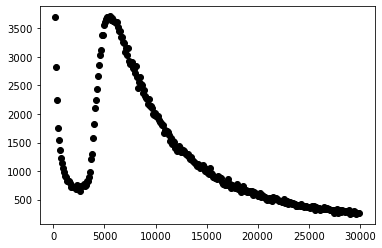

In [32]:
plot_data()

Making a histogram of the number of times a particular $\sqrt{E^2-p^2}$ result occurs is a way to search for heavy particles that decay so quickly that they can’t be measured by the ATLAS detector directly. In this analysis, we’re searching for the Higgs boson decaying to two photons.

Let's try separate the signal from the background to see a more significant bump around the Higgs mass.

## Applying cuts - Week 9 <a id="applying_cuts"></a>

The select_eta function is provided as an example.

1. In the `select_pt` function, uncomment the IF statement for `if photon_pt_1 greater than 40 and photon_pt_2 greater than 30: return True`
2. In the `select_etcone20` function, uncomment the IF statement for `if both photon_etcone20 less than 4: return True`
3. In the `select_isTightID` function, uncomment the IF statement for `if both photon_isTightID are True: return True`
4. In the top menu, click 'Run' -> 'Run all'

In [ ]:
# Select eta outside the barrel/end-cap transition region
# you can think of eta as the photon's position in the detector
# paper: "excluding the calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52"
def select_eta(photon_eta_1,photon_eta_2):
# want to keep events where absolute value of photon_eta is outside the range 1.37 to 1.52
    # if absolute value of either photon_eta between 1.37 and 1.52: return False
    if abs(photon_eta_1)>1.37 and abs(photon_eta_1)<1.52: return False
    if abs(photon_eta_2)>1.37 and abs(photon_eta_2)<1.52: return False
    else: return True
    
all_data = all_data[ np.vectorize(select_eta)(all_data.photon_eta_1,all_data.photon_eta_2) ]


# Select photons with high pt
# pt is related to the photon's momentum
# paper: "The leading (sub-leading) photon candidate is required to have ET > 40 GeV (30 GeV)"
def select_pt(photon_pt_1,photon_pt_2):
# want to keep events where photon_pt_1>40 GeV and photon_pt_2>30 GeV
    # if photon_pt_1 greater than 40 GeV and photon_pt_2 greater than 30 GeV: return True
    #if photon_pt_1>40 and photon_pt_2>30: return True
    else: return False
    
all_data = all_data[ np.vectorize(select_pt)(all_data.photon_pt_1,all_data.photon_pt_2) ]


# Select photons with low noise around them
# you can think of etcone20 as how much noise is going on around the photon
# paper: "Photon candidates are required to have an isolation transverse energy of less than 4 GeV"
def select_etcone20(photon_etcone20_1,photon_etcone20_2):
# want to keep events where isolation eT<4 GeV
    # if both photon_etcone20 less than 4 GeV: return True
    #if photon_etcone20_1<4 and photon_etcone20_2<4: return True
    else: return False
    
all_data = all_data[ np.vectorize(select_etcone20)(all_data.photon_etcone20_1,all_data.photon_etcone20_2) ]


# Select tightly identified photons
# isTightID==True means a photon more likely to be a real photon, and not some error in the detector
# paper: "Photon candidates are required to pass identification criteria"
def select_isTightID(photon_isTightID_1,photon_isTightID_2):
# isTightID==True means a photon identified as being well reconstructed
# want to keep events where True for both photons
    # if both photon_isTightID are True: return True
    #if photon_isTightID_1==True and photon_isTightID_2==True: return True
    else: return False

all_data = all_data[ np.vectorize(select_isTightID)(all_data.photon_isTightID_1,all_data.photon_isTightID_2) ]

After making the cuts, check out how the plot has changed. <a id="view_plot_after"></a>

In [ ]:
plot_data()

Now that we've applied cuts to separate signal from background, let's make a fit.

## Fitting - Week 10 <a id="fitting"></a>

Define function to fit to data:

In [ ]:
def func(x, a, b, c, d, e, A, mu, sigma): # define function for polynomial + Gaussian
    return a + b*x + c*x**2+ d*x**3 + e*x**4 + A*np.exp(-0.5*((x-mu)/sigma)**2)

data = plot_data() # draw a plot
errors = np.sqrt(data) # get the errors on the y values

# data fit
popt,_ = curve_fit(func, # function to fit
                   bin_centres, # x
                   data, # y
                   p0=[data.max(),0,0,0,0,91.7,125,2.4], # initial guesses for the fit parameters
                   sigma=errors) # errors on y

# background part of fit
a = popt[0] # a of a + b*x + c*x^2 + d*x^3 + e*x^4
b = popt[1] # b of a + b*x + c*x^2 + d*x^3 + e*x^4
c = popt[2] # c of a + b*x + c*x^2 + d*x^3 + e*x^4
d = popt[3] # d of a + b*x + c*x^2 + d*x^3 + e*x^4
e = popt[4] # e of a + b*x + c*x^2 + d*x^3 + e*x^4
# get the background only part of the fit to data
background_fit = a + b*bin_centres + c*bin_centres**2 + d*bin_centres**3 + e*bin_centres**4

A = popt[5] # amplitude of Gaussian
mu = popt[6] # centre of Gaussian
sigma = popt[7] # width of Gaussian
fit = func(bin_centres,a,b,c,d,e,A,mu,sigma) # call func with fitted parameters

# plot the signal + background fit
plt.plot(bin_centres, # x
         fit, # y
         '-r', # single red line
         label='Sig+Bkg Fit ($m_H=125$ GeV)' )

# plot the background only fit
plt.plot(bin_centres, # x
         background_fit, # y
         '--r', # dashed red line
         label='Bkg (4th order polynomial)' )

plt.ylabel( 'Events' ) # write y-axis label for main axes
plt.ylim( bottom=0 ) # set the y axis limit for the main axes
plt.xlabel(r'di-photon invariant mass $\mathrm{m_{\gamma\gamma}}$ [GeV]') # x-axis label

# draw the legend
plt.legend()

print('gaussian centre = '+str(mu))
print('gaussian sigma = '+str(sigma))

The steps that happen above are:
1. A histogram of $M$ vs. the number of events is drawn.
2. The error bars on the number of events are given by statistical uncertainty, i.e. the square root of the number of events, e.g. 10000 $\pm$ 100. The errors bars on $M$ are given by the width of the histogram bin. 
3. A 4th order polynomial + Gaussian fit is used around the peak in $M$. The parameters of the fit are estimated, using the bin centres as *x* values, measured data points as the *y* values and error bars as the *y* uncertainty.
4. To find the centre of the Gaussian, we need to subtract the polynomial background. 
5. The fit is performed to find the values of the fit parameters that minimize the $\chi^2$. 
6. The polynomial+Gaussian fit is plotted.
7. The polynomial only fit is plotted.
8. Gaussian centre and Gaussian sigma are printed.

Let's print the array of fitted values to give you an idea of how it looks.

In [ ]:
print(fit)

and now the array of data values

In [ ]:
print(data)

and lastly the array of data errors

In [ ]:
print(errors)

## Chi squared - Week 10 <a id="chi"></a>

Recall that the function for $\chi^2$ is 
$$\Sigma{(\frac{fit-data}{errors})^2}$$ 
where the sum is over each data point

1. Fill in the variable `fit_minus_data`
2. Use the variable `fit_minus_data` to fill the variable `fit_minus_data_over_errors`
3. Use the variable `fit_minus_data_over_errors` to fill the variable `fit_minus_data_over_errors_squared`
4. Use the variable `fit_minus_data_over_errors_squared` to fill the variable `chisq`
5. In the top menu, click 'Run' -> 'Run all'

In [ ]:
# calculate chi squared
fit_minus_data = 
fit_minus_data_over_errors = 
fit_minus_data_over_errors_squared = 
chisq = 

print('chi^2 = '+str(chisq))

1. Write your value for the mass of the Higgs boson, $M_H$. From the width of the fitted peak, also write the uncertainty on $M_H$.

Now let's move onto whether this is a good fit.

The formula for the 4th order polynomial fit is given by
$$y=a+bx+cx^2+dx^3+ex^4,$$
where $a$, $b$, $c$, $d$, $e$ are variables in the fit. The formula for the Gaussian fit is given by
$$y=Aexp[-0.5((x-\mu)/\sigma )^2],$$
where $A$ is the amplitude, $\mu$ is the centre, $\sigma$ is the sigma.
2. Explain whether this is a good fit, and try give some reasoning as to why this is/isn’t a good fit. The null hypothesis is that only background is present, and no signal. Reminder: $\chi^2$ is printed out just above.
3. Compare your result with the accepted value for $M_H$: do they agree? If they differ, by how much do they differ (in terms of the measured uncertainty on your result)?
4. At the end of your analysis, discuss whether your result is compatible with the accepted value for the Higgs mass.

And that's it! You can finish there or you can explore this analysis further using the suggestions below.

## What can you do to explore this analysis? <a id="going_further"></a>

* Increase the fraction of data used in '[Input data](#fraction)'
* Use data_B, data_C and data_D in '[Input data](#fraction)'
* Try different initial guesses for the parameters of the fit in '[Fitting](#fitting)'
* Try different functions for the fit in '[Fitting](#fitting)'
* Check how many events are being thrown away by each selection in '[Applying cuts](#applying_cuts)'
* Define more cuts from the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#se0090) and then apply them in '[Applying cuts](#applying_cuts)'
* Add some extra commands in '[Fitting](#fitting)' to make it look more similar to the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#fg0040)
* Your idea!

[Back to instructions](#instructions)

[Back to the plot before making cuts](#view_plot_before)

[Back to the plot after making cuts](#view_plot_after)